In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
texts = [
    "I love this product",
    "This is amazing and fantastic",
    "Very happy with the service",
    "Excellent quality and great value",
    "I am extremely satisfied",

    "I hate this product",
    "This is terrible and awful",
    "Very disappointed with the service",
    "Worst experience ever",
    "Not happy at all"
]

labels = [1,1,1,1,1, 0,0,0,0,0]  # 1 = Positive, 0 = Negative

data = pd.DataFrame({"Text": texts, "Sentiment": labels})

In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Text"])
y = np.array(labels)


In [4]:
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [5]:
mystery_text = ["The product quality is excellent"]
X_test = vectorizer.transform(mystery_text)

probabilities = model.predict_proba(X_test)
prediction = model.predict(X_test)

print("Mystery Sentence:", mystery_text[0])
print(f"Probability of Negative: {probabilities[0][0]*100:.2f}%")
print(f"Probability of Positive: {probabilities[0][1]*100:.2f}%")
print("Predicted Sentiment:", "Positive" if prediction[0] == 1 else "Negative")

Mystery Sentence: The product quality is excellent
Probability of Negative: 21.67%
Probability of Positive: 78.33%
Predicted Sentiment: Positive


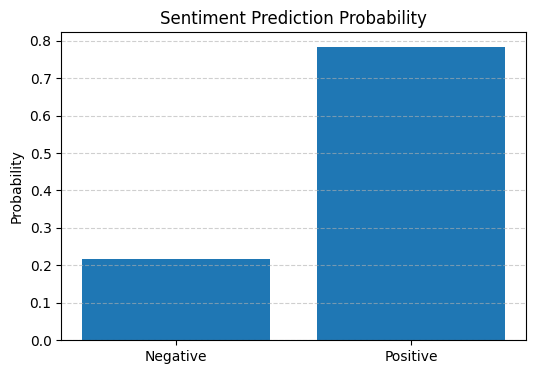

In [6]:
plt.figure(figsize=(6,4))
classes = ["Negative", "Positive"]
plt.bar(classes, probabilities[0])
plt.title("Sentiment Prediction Probability")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

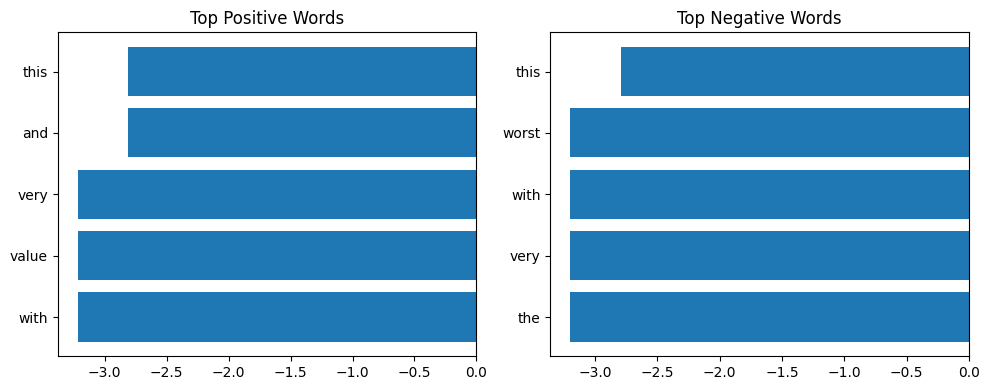

In [7]:
feature_names = np.array(vectorizer.get_feature_names_out())
log_probs = model.feature_log_prob_

top_positive = feature_names[np.argsort(log_probs[1])[-5:]]
top_negative = feature_names[np.argsort(log_probs[0])[-5:]]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.barh(top_positive, sorted(log_probs[1])[-5:])
plt.title("Top Positive Words")

plt.subplot(1,2,2)
plt.barh(top_negative, sorted(log_probs[0])[-5:])
plt.title("Top Negative Words")

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [9]:
texts = [
    "I love this movie",
    "This film is amazing",
    "Great acting and good story",
    "I enjoyed this movie",
    "Excellent direction",

    "I hate this movie",
    "This film is terrible",
    "Bad acting and poor story",
    "Worst movie ever",
    "I did not enjoy this movie"
]

labels = [1,1,1,1,1, 0,0,0,0,0]

data = pd.DataFrame({
    "Text": texts,
    "Sentiment": labels
})

In [10]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(data["Text"])
y = np.array(labels)

In [11]:
model = BernoulliNB()
model.fit(X, y)


BernoulliNB()

In [12]:
mystery_text = ["The movie has good acting"]
X_test = vectorizer.transform(mystery_text)

probabilities = model.predict_proba(X_test)
prediction = model.predict(X_test)

print("Mystery Sentence:", mystery_text[0])
print(f"Probability of Negative: {probabilities[0][0]*100:.2f}%")
print(f"Probability of Positive: {probabilities[0][1]*100:.2f}%")
print("Predicted Sentiment:", "Positive" if prediction[0]==1 else "Negative")


Mystery Sentence: The movie has good acting
Probability of Negative: 27.84%
Probability of Positive: 72.16%
Predicted Sentiment: Positive


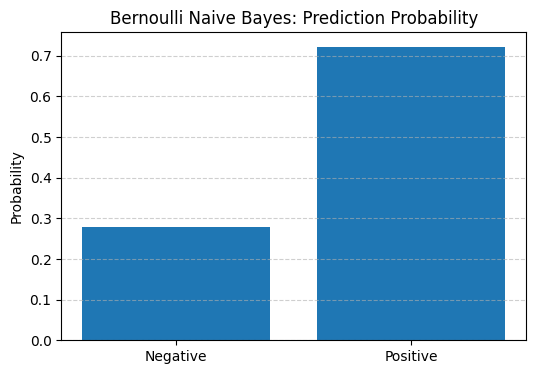

In [13]:
plt.figure(figsize=(6,4))
classes = ["Negative", "Positive"]

plt.bar(classes, probabilities[0])
plt.title("Bernoulli Naive Bayes: Prediction Probability")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


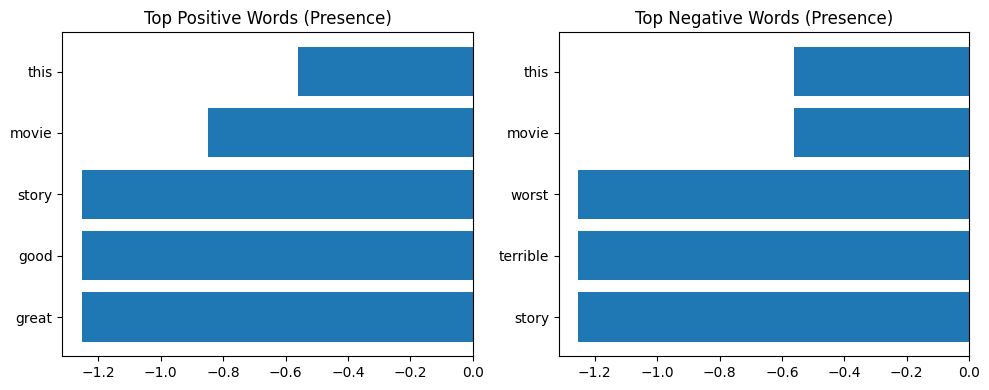

In [15]:
feature_names = np.array(vectorizer.get_feature_names_out())
log_probs = model.feature_log_prob_

top_positive = feature_names[np.argsort(log_probs[1])[-5:]]
top_negative = feature_names[np.argsort(log_probs[0])[-5:]]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.barh(top_positive, sorted(log_probs[1])[-5:])
plt.title("Top Positive Words (Presence)")

plt.subplot(1,2,2)
plt.barh(top_negative, sorted(log_probs[0])[-5:])
plt.title("Top Negative Words (Presence)")

plt.tight_layout()
plt.show()
